In [7]:
import requests
import openai
import os
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

openai.api_key = os.getenv("OPENAI_API_KEY")

client = openai.OpenAI()
base_image_dir = os.path.join("images", "01_generations")
original_prompt = "dolphins playing poker with some penguins"
n_variations = 4
# regenarete multiple prompts from the original prompt.

template = f"""Generate {n_variations} prompts from this original prompt: {original_prompt}. This will be used to query a genai image generation model. 
            Generate funny variations, add different types of styling to the image, such as realistic, comical, animated, and coloring styles. 
            Remember to split each variation with a '\n' new line character to be easily parsable. Output in a json format that can be parsed easily, each prompt should be a key value pair."""
# generate variations of the prompt using the OpenAI API GPT 4
response = client.chat.completions.create(
    model="gpt-4-1106-preview",
    max_tokens=1000,
    temperature=0.5,
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that can generate variations of prompts for image generation using stable difussion. Rembmer to not violate any content poliy restrictions. Dont generate harmful, bad content",
        },
        {"role": "assistant", "content": f"{template}"},
    ],
    response_format={"type": "json_object"},
)
# parse respo
print(response.choices[0].message.content)
# convert to json/dict

query_variations = response.choices[0].message.content
# convert to json


query_variations = json.loads(query_variations)


def query_multiple_variations_dalle(response_dict_gpt):

    # query the DALL-E model with the multiple variations of the prompt
    image_responses = []
    for prompt_nbr, variation in response_dict_gpt.items():
        print(variation)
        image_resp = client.images.generate(
            model="dall-e-3",
            prompt=variation,
            size="1024x1792",
            quality="standard",
            style="vivid",
            response_format="url",
            n=1,
        )
        image_responses.append((image_resp, variation))

    return image_responses


image_queries_list = query_multiple_variations_dalle(query_variations)
# generate list of tuples (image_url, prompt) from image_queries dict


def process_dalle_images(image_list, filename, image_dir):
    # save the images

    # urls list
    images = [query[0] for query in image_list]
    urls = [image.data[0].url for image in images]
    images = [requests.get(url=url).content for url in urls]  # download images
    image_names = [
        f"{filename}_{i + 1}.png" for i in range(len(images))
    ]  # create names
    filepaths = [
        os.path.join(image_dir, name) for name in image_names
    ]  # create filepaths
    for image, filepath in zip(images, filepaths):  # loop through the variations
        with open(filepath, "wb") as image_file:  # open the file
            image_file.write(image)  # write the image to the file

    return filepaths


# save images
filepaths = process_dalle_images(
    image_list=image_queries_list, filename="generation", image_dir=base_image_dir
)

{
  "prompt1": "A whimsical cartoon-style illustration of dolphins and penguins engaged in a high-stakes poker game underwater, with exaggerated facial expressions and comical attire.",
  "prompt2": "A hyper-realistic oil painting of dolphins and penguins sitting around an old wooden poker table, with a dimly lit, smoky room atmosphere, reminiscent of a classic gambling scene.",
  "prompt3": "A vibrant, digital anime-like depiction of dolphins and penguins playing poker, featuring bright colors, energetic lines, and each character having a unique, exaggerated personality.",
  "prompt4": "A vintage black and white ink drawing of dolphins and penguins in a 1920s speakeasy poker game, with period-appropriate hats and vests, and a sense of nostalgia."
}
A whimsical cartoon-style illustration of dolphins and penguins engaged in a high-stakes poker game underwater, with exaggerated facial expressions and comical attire.
A hyper-realistic oil painting of dolphins and penguins sitting around a

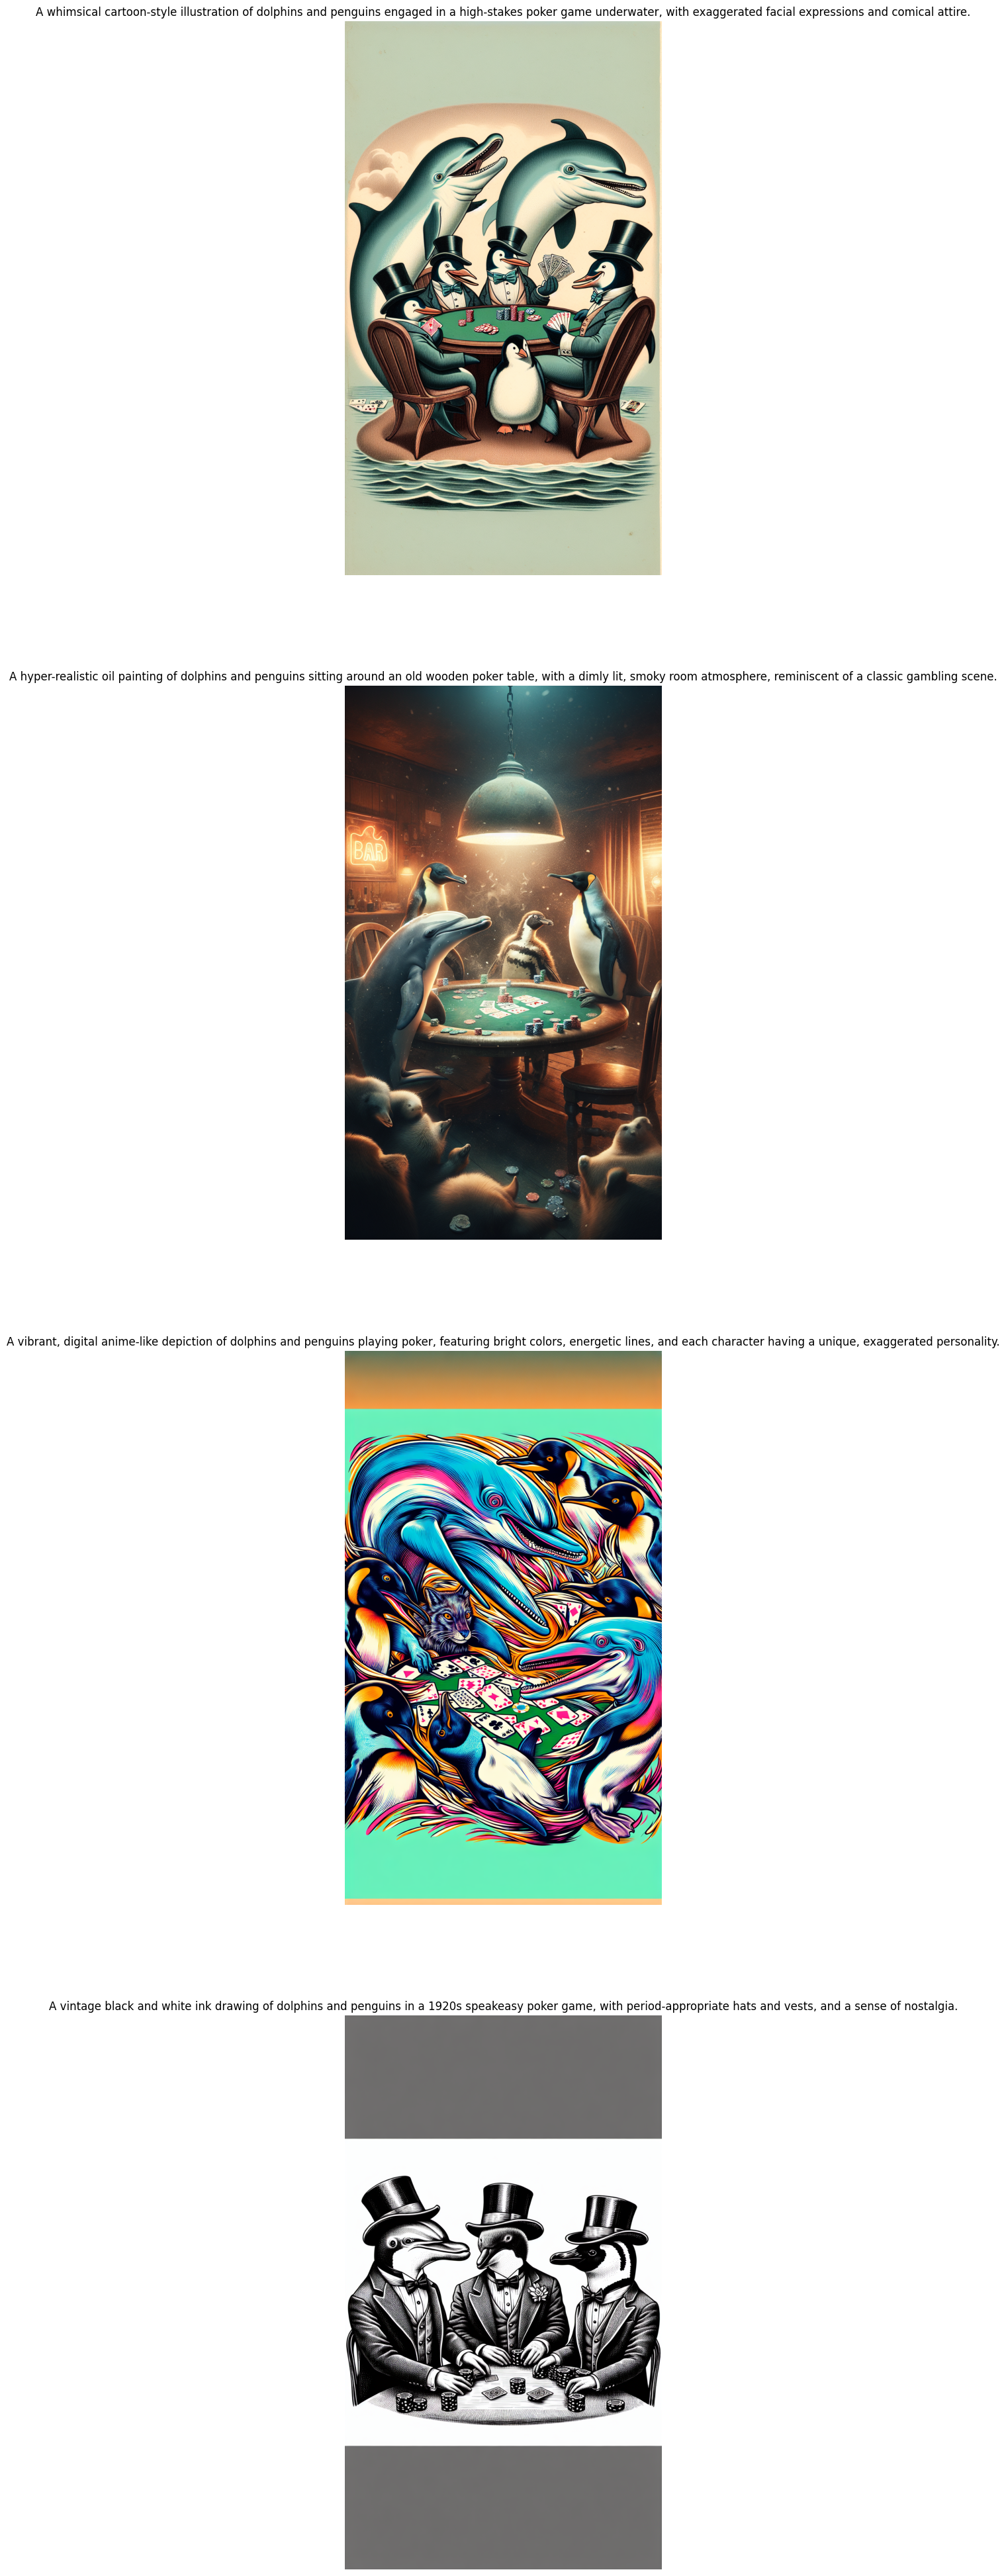

In [8]:
# display images using matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# display images in each row
n_cols = 1
n_rows = len(filepaths)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(50, 50))
for i, filepath in enumerate(filepaths):
    img = mpimg.imread(filepath)
    # add prompt as title to each image
    ax[i].set_title(image_queries_list[i][1])
    ax[i].imshow(img)
    ax[i].axis("off")

In [5]:
from utils import (
    generate_query_variations_gpt,
    process_dalle_images,
    query_multiple_variations_dalle,
)

import requests
import openai
import os
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

openai.api_key = os.getenv("OPENAI_API_KEY")

client = openai.OpenAI()
base_image_dir = os.path.join("images", "01_generations")
original_prompt = "two dogs playing chess, oil painting"
n_variations = 4
original_prompt = "two dogs playing chess, oil painting"

In [2]:
response_dict_gpt = generate_query_variations_gpt(
    original_prompt=original_prompt, n_variations=4
)

In [3]:
response_dict_gpt

{'prompt1': 'Two pugs dressed as medieval knights engrossed in a game of chess, in the style of a Renaissance oil painting',
 'prompt2': 'A pair of cartoonish bulldogs humorously glaring at each other over a chessboard, vibrant comic book colors',
 'prompt3': 'Two dogs playing chess in a lush garden, a photorealistic interpretation with intricate details',
 'prompt4': 'Animated corgis contemplating chess moves in a Pixar-like animation style, bright and cheerful colors'}

In [6]:
image_responses = query_multiple_variations_dalle(response_dict_gpt)

# process images
filepaths = process_dalle_images(
    image_list=image_responses,
    filename="generation",
    image_dir=base_image_dir,
)

Two pugs dressed as medieval knights engrossed in a game of chess, in the style of a Renaissance oil painting
A pair of cartoonish bulldogs humorously glaring at each other over a chessboard, vibrant comic book colors
Two dogs playing chess in a lush garden, a photorealistic interpretation with intricate details
Animated corgis contemplating chess moves in a Pixar-like animation style, bright and cheerful colors
